In [1]:
#import necessary libraries
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  


In [2]:
import pandas as pd

# Define Directory Path
data_dir = r"C:\Users\Alexis\Documents\Urban-Air-Quality\Data\Urban Air Quality and Health Impact Dataset.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_dir)

# Display the first few rows of the DataFrame
df.head()


,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


preciptype        622
snowdepth          71
stations          933
Condition_Code    431
dtype: int64


In [4]:
# Drop unnecessary columns
df.drop(columns=['datetimeEpoch'], inplace=True)


In [5]:
# Calculate the percentage of missing data
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage[missing_percentage > 0])


preciptype        62.2
snowdepth          7.1
stations          93.3
Condition_Code    43.1
dtype: float64


In [15]:
# Drop 'stations' column due to excessive missing data
df_cleaned = df.drop(columns=['stations'])

# Impute missing values for 'preciptype' and 'Condition_Code' using the mode (most frequent value)
# Mode imputation is used because these are categorical variables
df_cleaned['preciptype'] = df_cleaned['preciptype'].fillna(df_cleaned['preciptype'].mode()[0])
df_cleaned['Condition_Code'] = df_cleaned['Condition_Code'].fillna(df_cleaned['Condition_Code'].mode()[0])

# Impute missing values for 'snowdepth' using the median
# Median is preferred here as it is a continuous variable with a few missing values
df_cleaned['snowdepth'] = df_cleaned['snowdepth'].fillna(df_cleaned['snowdepth'].median())

# Re-check for any remaining missing values after imputation
missing_values_after = df_cleaned.isnull().sum()

# Display columns with any remaining missing values (should ideally return no columns)
print("Remaining missing values after cleaning:")
print(missing_values_after[missing_values_after > 0])


Remaining missing values after cleaning:
Series([], dtype: int64)


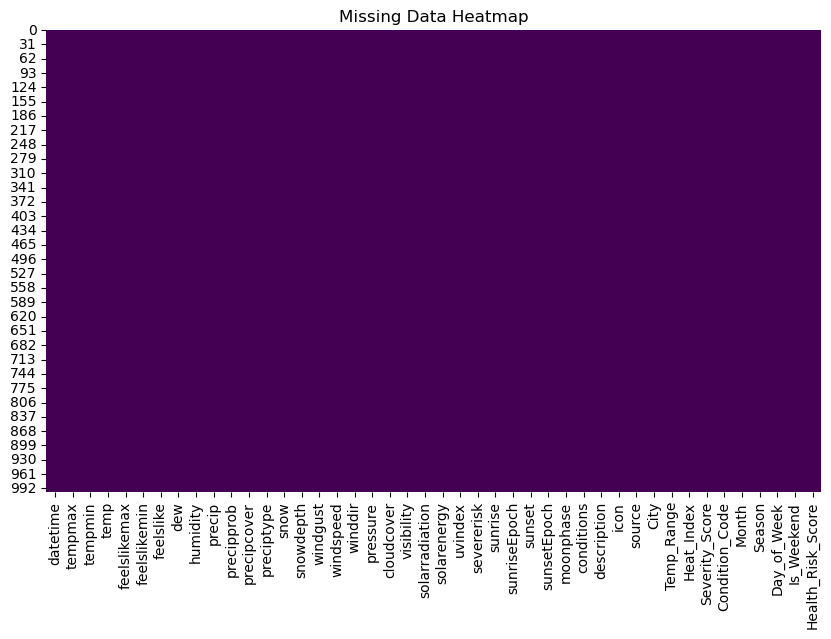

In [7]:
# Visualizing missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [8]:
#Yay we're good to go

In [9]:
# Descriptive statistics for numerical columns
df_cleaned.describe()


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,severerisk,sunriseEpoch,sunsetEpoch,moonphase,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Health_Risk_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000
mean,85.106961,68.641638,76.115967,85.195384,68.547548,76.323286,57.267120,56.782281,0.032135,12.599437,...,12.923695,1.726309e+09,1.726353e+09,0.383811,16.469899,80.195613,3.057743,0.0,9.0,9.729103
std,9.524231,8.474102,8.722070,9.496951,8.365809,8.621361,9.161517,16.708667,0.083461,17.886200,...,8.838858,3.753453e+05,3.753012e+05,0.147229,5.552785,6.053805,0.624024,0.0,0.0,0.679728
min,62.035432,49.108218,55.548415,62.206413,48.834041,57.748822,26.261814,11.752135,-0.021213,-5.901591,...,7.507579,1.725668e+09,1.725686e+09,0.123494,1.676587,65.511677,1.578048,0.0,9.0,8.492431
25%,78.661118,62.678245,69.102499,78.485332,62.734961,68.930104,51.229378,49.982029,-0.000511,1.175418,...,9.705341,1.725976e+09,1.726021e+09,0.247940,13.319119,76.287207,2.583375,0.0,9.0,9.195244
50%,84.322847,67.702405,75.222751,84.284077,67.844544,75.544961,58.598490,58.486182,0.004000,5.463395,...,10.080919,1.726312e+09,1.726352e+09,0.385185,16.694710,78.562345,3.026242,0.0,9.0,9.546156
75%,91.653987,75.585109,82.396698,93.757026,75.591093,84.309449,62.738294,66.560400,0.015258,19.540238,...,10.860683,1.726642e+09,1.726687e+09,0.516248,20.734495,85.318985,3.507127,0.0,9.0,10.242523
max,107.797400,91.635546,99.851684,105.060170,89.369854,98.193984,76.648668,92.459293,0.471666,103.539121,...,61.727919,1.726991e+09,1.727027e+09,0.649488,29.790757,96.684162,5.158112,0.0,9.0,11.485725


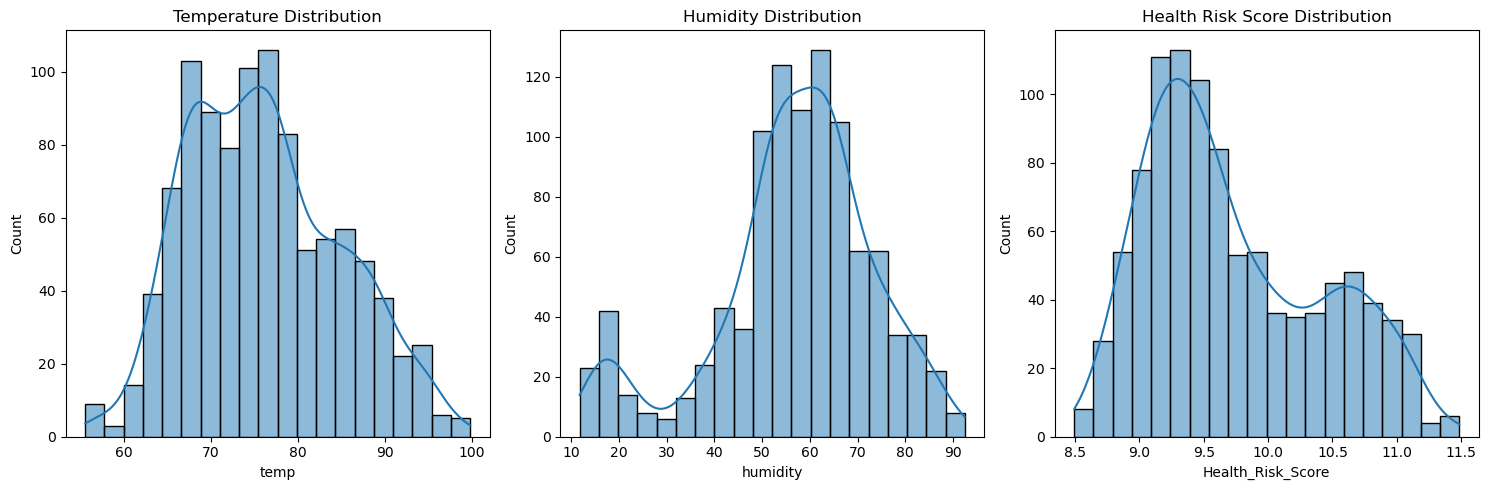

In [10]:
# Plot distribution of key numerical features
plt.figure(figsize=(15, 5))

# Temperature distribution
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['temp'], bins=20, kde=True)
plt.title('Temperature Distribution')

# Humidity distribution
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['humidity'], bins=20, kde=True)
plt.title('Humidity Distribution')

# Health Risk Score distribution
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['Health_Risk_Score'], bins=20, kde=True)
plt.title('Health Risk Score Distribution')

plt.tight_layout()
plt.show()


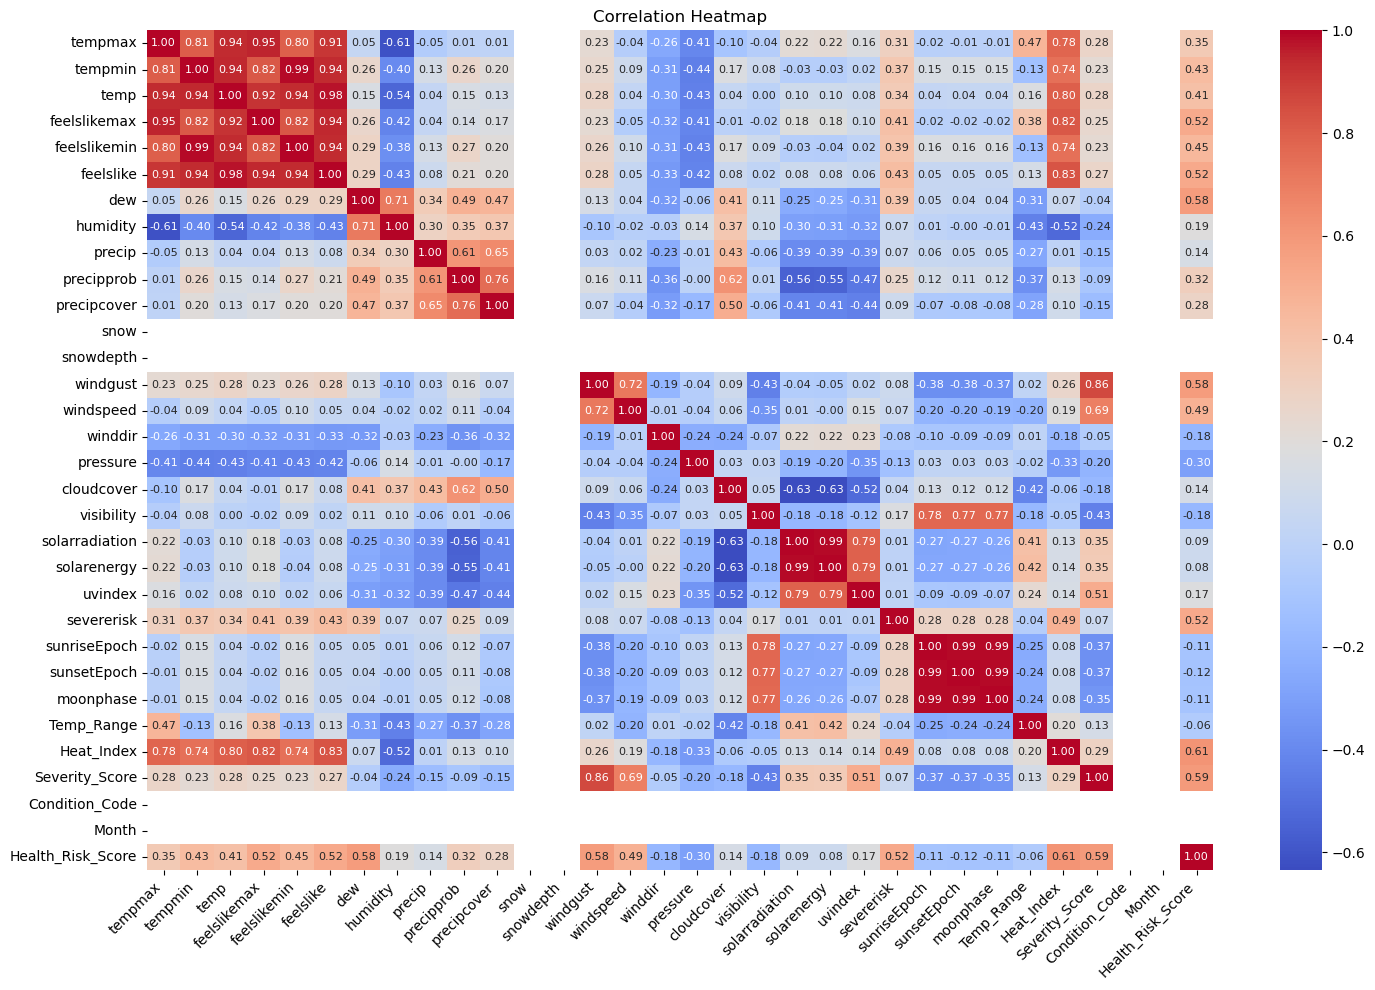

In [25]:
# Plot the correlation heatmap with larger figure size and rotated labels
plt.figure(figsize=(15, 10))  # Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})  # Use smaller font for annotations
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()



In [17]:
# Check for unique values and variance in 'snow' and 'snowdepth'
# We check these columns because they did not show up in the correlation matrix,
# and we want to verify if they contain meaningful information or if they are constant across all rows.

print(df_cleaned['snow'].unique())  # Check unique values in 'snow' column
print(df_cleaned['snowdepth'].unique())  # Check unique values in 'snowdepth' column

# Check variance in these columns to confirm if they have any variation
# If the variance is zero, it means all the values are the same and thus do not contribute to the analysis.
print(df_cleaned[['snow', 'snowdepth']].var())


[0.]
[0.]
snow         0.0
snowdepth    0.0
dtype: float64


In [ ]:
# Analysis of the Correlation Matrix:
# The correlation matrix reveals several important insights about the dataset:
# 1. Strong correlations exist between different temperature-related features such as tempmax, tempmin, and feelslike.
#    - For example, 'tempmax' and 'temp' show a correlation of 0.94, indicating that maximum temperatures strongly influence overall temperature trends.
# 2. Wind-related features (windgust, windspeed) have a moderate to low correlation with other factors, suggesting wind may not be a primary predictor in health risk scores or temperature fluctuations.
# 3. The 'Health_Risk_Score' shows the strongest correlation with 'Heat_Index' (0.61), indicating that heat plays a significant role in determining the overall health risk.
# 4. Precipitation-related variables (precipprob and precipcover) display moderate correlations (0.65-0.76), suggesting interdependency in measuring precipitation probability and coverage.
# 5. Features like 'snow' and 'snowdepth' were not relevant (as we saw earlier they contained no variance), and thus provide no useful correlation data.
# 6. This analysis highlights key factors that influence health risk, temperature, and environmental conditions. The strongest correlations will guide further feature selection for predictive modeling.


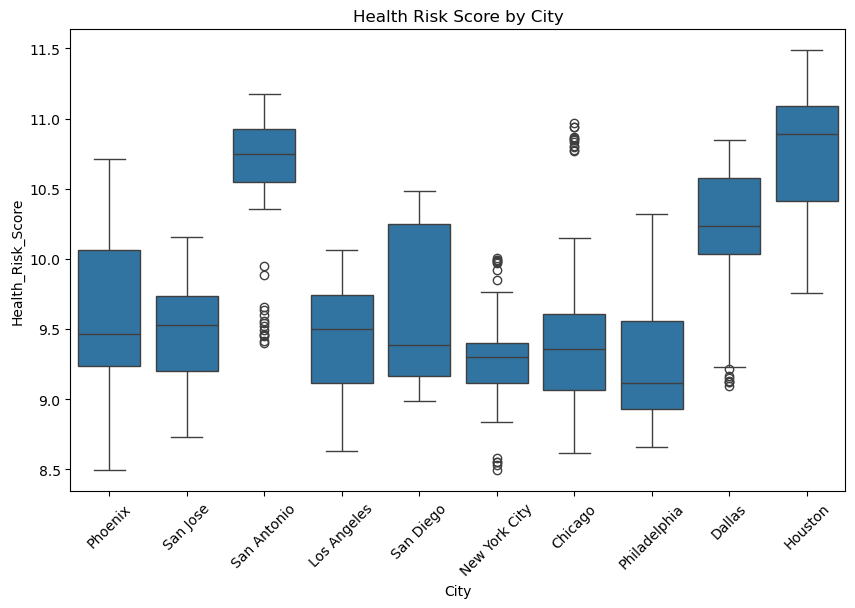

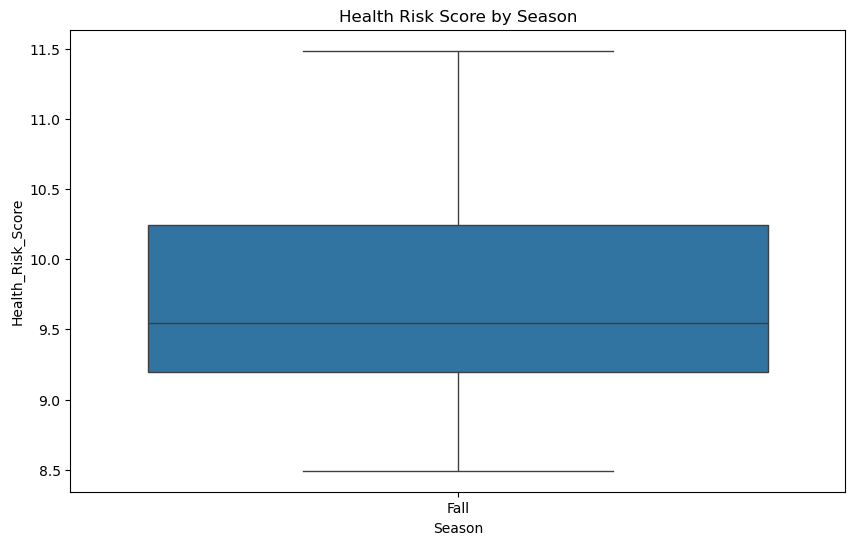

In [18]:
# Boxplot of health risk score by city
plt.figure(figsize=(10,6))
sns.boxplot(x='City', y='Health_Risk_Score', data=df_cleaned)
plt.title('Health Risk Score by City')
plt.xticks(rotation=45)
plt.show()

# Boxplot of health risk score by season
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Health_Risk_Score', data=df_cleaned)
plt.title('Health Risk Score by Season')
plt.show()



In [ ]:
# Analysis of Boxplots:
# 1. Health Risk Score by City:
#    - There is noticeable variation in health risk scores across different cities.
#    - Dallas and Houston show higher median health risk scores compared to other cities, suggesting these locations may have more significant environmental or climate-related risks.
#    - San Antonio has a much narrower interquartile range (IQR), indicating less variability in health risk scores, while cities like Philadelphia and San Diego exhibit a wider spread, showing more variation in health risks.
#    - Outliers are present in cities like San Antonio and New York City, highlighting certain days with significantly different health risk scores.
# 
# 2. Health Risk Score by Season:
#    - The single season represented here, Fall, shows a relatively uniform distribution of health risk scores, with a median value slightly below 10.
#    - There is a wide range in scores, spanning from approximately 8.5 to 11. However, the central 50% of the data (the IQR) is more tightly packed between 9.5 and 10.5.
#    - More seasons would need to be analyzed to get a full picture of how seasonality impacts health risk.


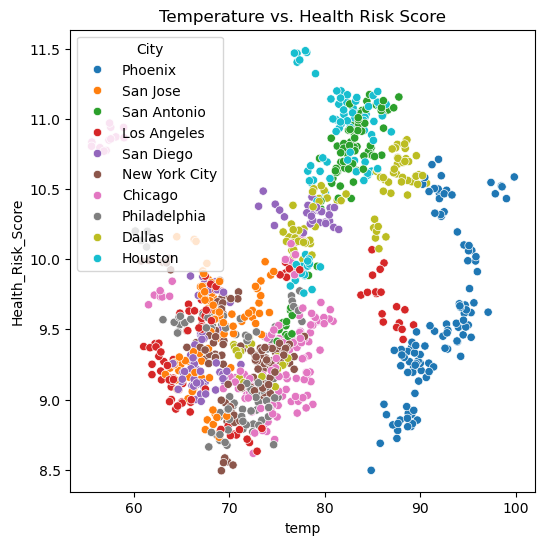

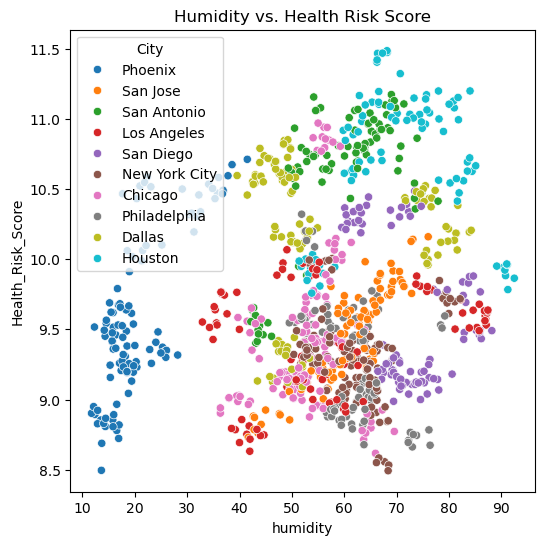

In [19]:
# Scatter plot for temperature vs. health risk score
plt.figure(figsize=(6,6))
sns.scatterplot(x='temp', y='Health_Risk_Score', data=df_cleaned, hue='City')
plt.title('Temperature vs. Health Risk Score')
plt.show()

# Scatter plot for humidity vs. health risk score
plt.figure(figsize=(6,6))
sns.scatterplot(x='humidity', y='Health_Risk_Score', data=df_cleaned, hue='City')
plt.title('Humidity vs. Health Risk Score')
plt.show()


In [ ]:
# Analysis of Scatter Plots:
# Temperature vs Health Risk Score shows a clear positive trend, indicating that higher temperatures correspond with higher health risk scores,
# especially in cities like Phoenix and San Antonio. 
# Humidity vs Health Risk Score shows more variation, suggesting that humidity alone may not have as strong an effect on health risk scores as temperature.
# Cities with extreme temperatures tend to have higher health risk scores, while the relationship with humidity is less pronounced.
